# Exercises "Lecture 8: Exploratory Data Analysis and Visualisation"

In this session, we will compute statistics and visualizations on Wikipedia articles from 16 categories, namely:

> Airports, Artists, Astronauts, Astronomical_objects, Building, City, Comics_characters, Companies, Foods, Monuments_and_memorials, Politicians, Sports_teams, Sportspeople, Transport, Universities_and_colleges, Written_communication.

Data: wkp directory containing .txt files         
Python libraries
- [os](https://docs.python.org/3.8/library/os.html), for listdir() to list files in a directory
- [glob](https://docs.python.org/3/library/glob.html), for listing files in a directory whose names match certain patterns
- [re](https://docs.python.org/3.8/library/re.html), for regular expressions
- pandas
- spacy (or Stanza)

In [ ]:
# LOAD THE LIBRARIES
import os
import glob
import re
import pandas
import spacy

## Regexp and loading text files into a Pandas dataframe

**Exercise 1**

* Get the list of file names in the **wkp/** directory
* Hint: You can use os.path.basename to help you
* Use a regexp together with the list of categories (given above: 'Airports', 'Artists'....) to split each file name  into 'id' and 'category'. For example:

> File Name: 'Monteverde_Angel_Monuments_and_memorials'

is split into:

> Id: 'Monteverde_Angel'

> Category: 'Monuments_and_memorials'

* store each processed filename in a list of lists. The list is of the form
```[[File name, Id, Category], ...]```

In [ ]:
# YOUR CODE HERE
dir_list = os.listdir(r"C:\Users\Ahana\OneDrive\Desktop\wkp")
print(dir_list)
final_list = []
for filename in dir_list:
    try:
        filename_str = filename.split(".")[0]
        pattern = re.compile(r"(.+)_(Airports|Artists|Astronauts|Astronomical_objects|Building|City|Comics_characters|Companies|Foods|Monuments_and_memorials|Politicians|Sports_teams|Sportspeople|Transport|Universities_and_colleges|Written_communication)")
        res_final = re.search(pattern, filename_str)
        final_list.append([filename_str, res_final.group(1), res_final.group(2)])
    except AttributeError:
        pass
print(final_list)

['++idlochovice_City.txt', 'Airports_of_Serbia_Airports.txt', 'Airport_authority_Airports.txt', 'Airport_bus_Airports.txt', 'Airport_check-in_Airports.txt', 'Airport_security_Airports.txt', 'Airspace_Airports.txt', 'Airspace_Transport.txt', 'Airway_beacon_Airports.txt', 'Airway_beacon_Transport.txt', 'Aisam-ul-Haq_Qureshi_career_statistics_Sportspeople.txt', 'Aish_tamid_Monuments_and_memorials.txt', 'Aita_Mari_Transport.txt', 'Aiwowo_Foods.txt', 'Aj+¡_(sauce)_Foods.txt', 'Ajilim+▌jili_Foods.txt', 'Ajman_International_Airport_Airports.txt', 'Akabeko_Building.txt', 'Akaflieg_Transport.txt', 'Akay_Artists.txt', 'Akie_Dagogo_Fubara_Transport.txt', 'Akira_Ry+ì_Sportspeople.txt', 'Akira_Toriyama_(ophthalmologist)_Universities_and_colleges.txt', 'Akkamma_Devi_Politicians.txt', 'Akmal_Ikramov_Politicians.txt', 'Akmyrat_Rejepow_Politicians.txt', 'Akonnedi_Shrine_Monuments_and_memorials.txt', 'Akperan_Orshi_Polytechnic,_Yandev_Universities_and_colleges.txt', 'Aksel_J++rgensen_Artists.txt', 'Aksh

**Exercise 2**
* Extract the content of the file (use **read()**, cf. python_basics cheatsheet))
* Create a list of lists of the form (id, category, file_content). Save it to a variable "data4pandas" e.g.,

```
data4pandas = [['Monteverde_Angel', 'Monuments_and_memorials', 'The Monteverde Angel or Angel of the Resurrect ....], ...]
```

In [ ]:
# YOUR CODE HERE
data4pandas = []
dir_list = os.listdir(r"C:\Users\Ahana\OneDrive\Desktop\wkp")
for filename in dir_list:
    try:
        filename_str = filename.split(".")[0]
        pattern = re.compile(r"(.+)_(Airports|Artists|Astronauts|Astronomical_objects|Building|City|Comics_characters|Companies|Foods|Monuments_and_memorials|Politicians|Sports_teams|Sportspeople|Transport|Universities_and_colleges|Written_communication)")
        res_final = re.search(pattern, filename_str)
        with open(rf"C:\Users\Ahana\OneDrive\Desktop\wkp\{filename}", "r", encoding= "utf-8")as f:
            content =  f.read()
            data4pandas.append([res_final.group(1), res_final.group(2), content])
    except AttributeError:
        pass
print(data4pandas)



[['++idlochovice', 'City', 'Židlochovice (Czech pronunciation: [ˈʒɪdloxovɪtsɛ]; German: Groß Seelowitz) is a town in Brno-Country District in the South Moravian Region of the Czech Republic. It has about 3,800 inhabitants.\n\n\n== Geography ==\nŽidlochovice lies approximately 18 kilometres (11 mi) south of Brno. It is located in the valley of the river Svratka.\n\n\n== History ==\nThe first written mention of Židlochovice is from 1237. Among the owners of the Židlochovice manor were the houses of Pernštejn, Zierotin, Dietrichstein, and Habsburg. In 1873, Židlochovice was promoted to a town.Until 1918, Groß-Seelowitz – Židlochovice (named Seelowitz before 1867) was part of the Austrian monarchy (Austria side after the compromise of 1867), in the Auspitz – Hustopeče District, one of the 34 Bezirkshauptmannschaften in Moravia.\n\n\n== Notable people ==\nJohn III of Pernstein (1487–1548), nobleman; died here\nWenzel von Linhart (1821–1877), Austrian surgeon\nMaurice Strakosch (1825–1887), 

**Exercise 3**

* Create a dataframe from this list of lists (i.e. data4pandas). Remember to add the following column headers: 'id', 'category' and'text' (cf. pandas CS). Save this dataframe to a variable called 'df'. (it is a convention to name pandas dataframe starting with 'df')
* inspect for yourself the first 10 and last 10 rows

In [ ]:
# YOUR CODE HERE
import pandas as pd
df = pd.DataFrame(data4pandas, columns =['id', 'category', 'text'])
print(df.head(10))
print(df.tail(10))

                   id   category  \
0       ++idlochovice       City   
1  Airports_of_Serbia   Airports   
2   Airport_authority   Airports   
3         Airport_bus   Airports   
4    Airport_check-in   Airports   
5    Airport_security   Airports   
6            Airspace   Airports   
7            Airspace  Transport   
8       Airway_beacon   Airports   
9       Airway_beacon  Transport   

                                                text  
0  Židlochovice (Czech pronunciation: [ˈʒɪdloxovɪ...  
1  Airports of Serbia (Serbian Cyrillic: Аеродром...  
2  An airport authority is an independent entity ...  
3  An airport bus, or airport shuttle bus or airp...  
4  Airport check-in is the process whereby passen...  
5  Airport security refers to the techniques and ...  
6  Airspace is the portion of the atmosphere cont...  
7  Airspace is the portion of the atmosphere cont...  
8  An airway beacon (US) or aerial lighthouse (UK...  
9  An airway beacon (US) or aerial lighthouse (UK... 

## Extract the list of categories

**Exercise 4**
    
- store the content of the **'category'** column into a string (cf. Pandas CS)
- extract the set of unique categories from that string (cf. python basic CS)   
You should find the following 16 categories

```
['Comics_characters', 'Astronauts', 'Transport', 'Artists', 'Written_communication', 'Sports_teams', 'Foods', 'Airports', 'Monuments_and_memorials', 'Politicians', 'Sportspeople', 'Building', 'Universities_and_colleges', 'Astronomical_objects', 'Companies', 'City']
```

In [ ]:
# YOUR CODE HERE
category_string = df['category'].to_string(index=False)
category_set = {line.strip() for line in category_string.split('\n')}
print(category_set)


{'Artists', 'Sportspeople', 'Building', 'Universities_and_colleges', 'City', 'Written_communication', 'Astronomical_objects', 'Airports', 'Sports_teams', 'Monuments_and_memorials', 'Foods', 'Politicians', 'Transport', 'Astronauts', 'Comics_characters', 'Companies'}


## Extract the list of headers from the 'text' column

**Exercise 5**

Hint: In the Wikipedia articles, headers are surrounded by "=="

_*E.g., ==  Background == *_

- Define a function called 'get_title' which extracts headers from a text (Use a regular expression)
- Apply this function to the **'text'** column in your pandas data frame (use the pandas 'apply' method)
- Store the result (the list of headers associated with each text in the frame) into a new pandas serie called 'headers'
- Concatenate this series to your pandas dataframe

In [ ]:
# YOUR CODE HERE
import re

def get_title(text):
    pattern = re.compile(r'(==)(.+)(==)')
    result = re.search(pattern, text)
    return result.group(2)

headers = df['text'].apply(get_title)

df = pd.concat([df, headers.rename('headers')], axis=1)
print(df)

                       id      category  \
0           ++idlochovice          City   
1      Airports_of_Serbia      Airports   
2       Airport_authority      Airports   
3             Airport_bus      Airports   
4        Airport_check-in      Airports   
..                    ...           ...   
151  Vladimir_Dzhanibekov    Astronauts   
152                Votice          City   
153           Wetted_area      Building   
154       William_Hogarth       Artists   
155      Wolfgang_Nordwig  Sportspeople   

                                                  text  \
0    Židlochovice (Czech pronunciation: [ˈʒɪdloxovɪ...   
1    Airports of Serbia (Serbian Cyrillic: Аеродром...   
2    An airport authority is an independent entity ...   
3    An airport bus, or airport shuttle bus or airp...   
4    Airport check-in is the process whereby passen...   
..                                                 ...   
151  Vladimir Aleksandrovich Dzhanibekov (Russian: ...   
152  Votice (Czech 

## Extracting the vocabulary of each category

For each category, we extract the corresponding vocabulary i.e., the list of tokens occurring in the corresponding texts (removing the duplicates)


Optional: for each category
- extract the list of headers
- extract the noun and verbs

**Exercise 6**

* write a function called "remove_underscores" that takes a python string and replace all the '_' in it with a whitespace ' '. e.g. "This_is_a_text" becomes  "This is a text"
* write a function called "lowercase_string" that takes a python string and lowercases it. e.g. "This is a text" becomes  "this is a text"
* apply both of the remove_underscores and lowercase_string functions on the **'clean_text'** column of your dataframe. Save the output into a new column in your dataframe called 'clean_text' (consider using method chaining)

In [ ]:
# YOUR CODE HERE
def remove_underscores(string_x):
    res1 = string_x.replace("_", " ")
    return res1
def lowercase_string(string_x):
    res2 = string_x.lower()
    return res2

clean_text = df['text'].apply(remove_underscores).apply(lowercase_string)

df = pd.concat([df, clean_text.rename('clean_text')], axis=1)
print(df)

                       id      category  \
0           ++idlochovice          City   
1      Airports_of_Serbia      Airports   
2       Airport_authority      Airports   
3             Airport_bus      Airports   
4        Airport_check-in      Airports   
..                    ...           ...   
151  Vladimir_Dzhanibekov    Astronauts   
152                Votice          City   
153           Wetted_area      Building   
154       William_Hogarth       Artists   
155      Wolfgang_Nordwig  Sportspeople   

                                                  text  \
0    Židlochovice (Czech pronunciation: [ˈʒɪdloxovɪ...   
1    Airports of Serbia (Serbian Cyrillic: Аеродром...   
2    An airport authority is an independent entity ...   
3    An airport bus, or airport shuttle bus or airp...   
4    Airport check-in is the process whereby passen...   
..                                                 ...   
151  Vladimir Aleksandrovich Dzhanibekov (Russian: ...   
152  Votice (Czech 

**Exercise 7**

- Define a function 'get_tokens' which, given a category, return its vocabulary (the list of tokens occurring in the texts of that category and after removing the duplicates). One way to do this is to:
   - extract the category subframe i.e., all rows whose category column matches the input category
   - create a string out of the text column of that subframe (use str.cat(sep=" "), cf. Pandas CS)
   - run spacy or Stanza model on this string and extract the tokens from the resulting document (cf. Stanza or spacy CS)
   - use python set method to remove duplicate tokens
   - use python list method to convert the resulting set back into a list
- Create a new dataframe with headers **'CATEGORY'** and **'VOCABULARY'** in which you store for each category the corresponding vocabulary

In [ ]:
# YOUR CODE HERE

import pandas as pd
import spacy



# Sample SpaCy model
nlp = spacy.load("en_core_web_sm")

def get_tokens(category, dataframe):
    # Extract subframe for the given category
    subframe = dataframe[dataframe['category'] == category]

    # Create a string out of the text column of the subframe
    text_string = subframe['text'].str.cat(sep=" ")

    # Process the text with SpaCy
    doc = nlp(text_string)

    # Extract tokens and remove duplicates
    tokens = list(set([token.text for token in doc if not token.is_stop and token.is_alpha]))

    return tokens

# Create a list of unique categories
categories = df['category'].unique()

# Create a list to store (category, vocabulary) pairs
category_vocabulary = []

# Iterate over categories and get vocabulary for each category
for category in categories:
    vocabulary = get_tokens(category, df)
    category_vocabulary.append({'CATEGORY': category, 'VOCABULARY': vocabulary})

# Create a new DataFrame with headers 'CATEGORY' and 'VOCABULARY'
result_df = pd.DataFrame(category_vocabulary)
print(result_df)


                     CATEGORY  \
0                        City   
1                    Airports   
2                   Transport   
3                Sportspeople   
4     Monuments_and_memorials   
5                       Foods   
6                    Building   
7                     Artists   
8   Universities_and_colleges   
9                 Politicians   
10                  Companies   
11      Written_communication   
12       Astronomical_objects   
13          Comics_characters   
14                 Astronauts   
15               Sports_teams   

                                           VOCABULARY  
0   [Protestants, Hadahid, Omipidan, stopping, Box...  
1   [ATC, occurring, grass, layovers, challenges, ...  
2   [ATC, tried, statute, detect, Pilots, FV, open...  
3   [tried, widower, home, Nordwig, podiums, Swede...  
4   [Protestants, surveyed, grass, Ottocento, conf...  
5   [amagoi, fasting, theocracy, zeal, theologians...  
6   [tried, brick, detect, cm, home, open, aut

## Visualising the differences in vocabulary size

**Exercise 8**

- Use pandas 'apply' method to compute the size of each category's vocabulary (the number of tokens)
- Add a **'VOCAB SIZE'** column to your the dataframe created in the previous exercise in which you input the size of the vocabulary for each category

In [ ]:
# YOUR CODE HERE
def compute_vocab_size(vocabulary):
    return len(vocabulary)


result_df['VOCAB SIZE'] = result_df['VOCABULARY'].apply(compute_vocab_size)

print(result_df)

                     CATEGORY  \
0                        City   
1                    Airports   
2                   Transport   
3                Sportspeople   
4     Monuments_and_memorials   
5                       Foods   
6                    Building   
7                     Artists   
8   Universities_and_colleges   
9                 Politicians   
10                  Companies   
11      Written_communication   
12       Astronomical_objects   
13          Comics_characters   
14                 Astronauts   
15               Sports_teams   

                                           VOCABULARY  VOCAB SIZE  
0   [Protestants, Hadahid, Omipidan, stopping, Box...        2889  
1   [ATC, occurring, grass, layovers, challenges, ...        3089  
2   [ATC, tried, statute, detect, Pilots, FV, open...        2037  
3   [tried, widower, home, Nordwig, podiums, Swede...        1715  
4   [Protestants, surveyed, grass, Ottocento, conf...        3137  
5   [amagoi, fasting, theocrac

**Exercise 9**

Create a barplot showing the **VOCAB SIZE** of each **Category** (use e.g., pd.barh() method)

- the y axis should show the categories
- the x axis should show the vocabulary size

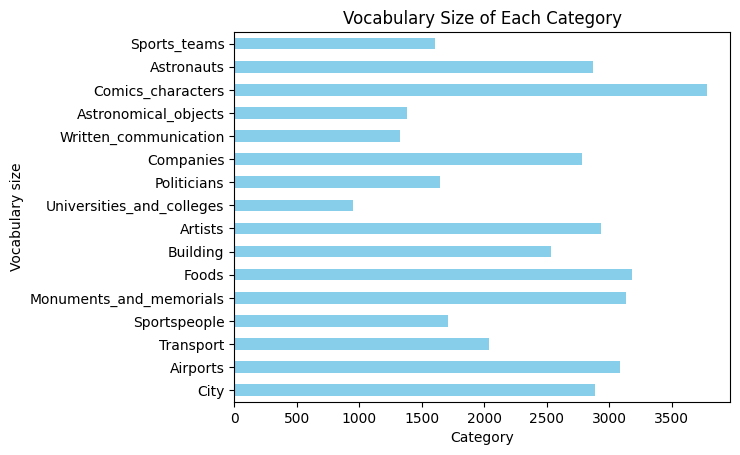

In [ ]:
# YOUR CODE HERE

import matplotlib.pyplot as plt

result_df.plot.barh(x='CATEGORY', y='VOCAB SIZE', color='skyblue', legend=None)
plt.xlabel('Category')
plt.ylabel('Vocabulary size')
plt.title('Vocabulary Size of Each Category')
plt.show()


**Exercise 10**
* create a scatter plot showing the correlation between the number of headers and each category
* reminder: you have the headers stored in the pandas dataframe saved to the 'df' variable

TypeError: 'value' must be an instance of str or bytes, not a float

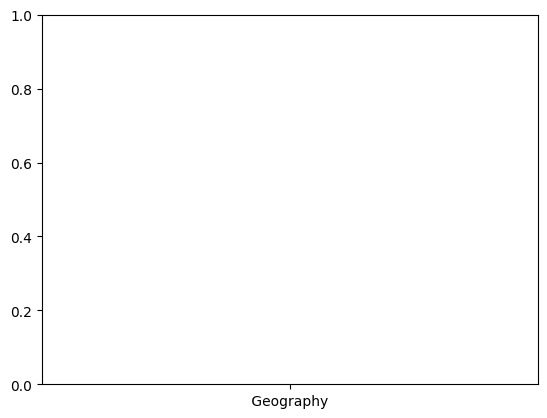

In [ ]:
# YOUR CODE HERE

